# Coefficient of Determination (R2)

In [3]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')

In [2]:
def r2(actual, predicted):
    if isinstance(actual, list):
        actual = np.array(actual)
    if isinstance(predicted, list):
        predicted = np.array(predicted)
        
    plt.scatter(actual, predicted);
    plt.plot(actual, actual, 'r', alpha=0.5)
    plt.scatter(actual, actual, facecolors='none', edgecolor='r', linestyle='-')
    plt.axhline(y=actual.mean(), ls='dashed')
        
    mean = actual.mean()
    ss_total = ((actual - mean) ** 2).sum()
    ss_residual = ((actual - predicted) ** 2).sum()
    return 1 - ss_residual / ss_total

We'll get a perfect `R2=1` if `actual` and `predicted` values are the same

In [4]:
actual = list(range(10))
actual

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

1.0

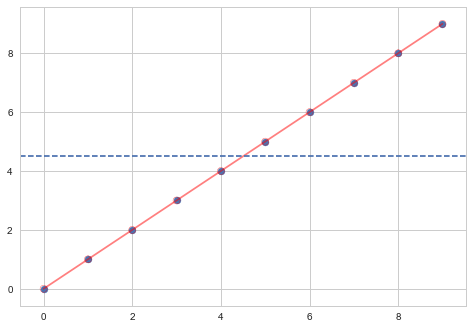

In [80]:
predicted = list(range(10))
r2(actual, predicted)

Now if we're a bit off on our predictions R2 will be still pretty high but not a perfect 1.

In [5]:
predicted = list(range(8)) + [9, 10]
predicted

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10]

0.97575757575757571

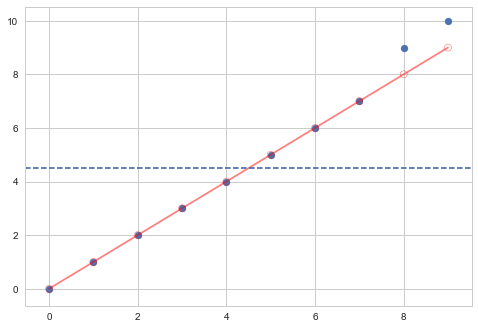

In [81]:
r2(actual, predicted)

Intuitively it makes sense that we get a worse `R2` if the predictions are farther off.

In [6]:
predicted = list(range(8)) + [13, 15]
predicted

[0, 1, 2, 3, 4, 5, 6, 7, 13, 15]

0.26060606060606062

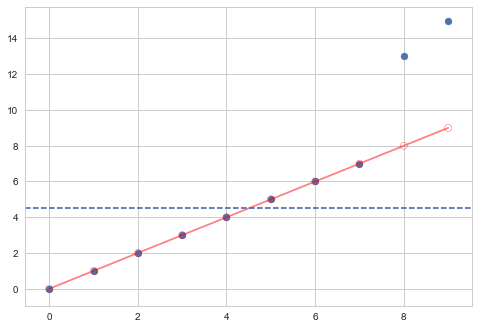

In [82]:
r2(actual, predicted)

Now here's the interesting situation: `R2` can be negative.

In [7]:
predicted = list(range(8)) + [100, 150]
predicted

[0, 1, 2, 3, 4, 5, 6, 7, 100, 150]

This is because `R2` is calculated relative to a hypothetical model that always predicts the mean of the actual values. Obviously we don't have access to the mean of actual values at the time of prediction but we do at evaluation time.

So looking at lines `12-13` in `In[2]` you can see that:
```
mean = actual.mean()
ss_total = ((actual - mean) ** 2).sum()
```

and then `R2` is:
```
ss_residual = ((actual - predicted) ** 2).sum()
R2 = 1 - ss_residual / ss_total
```

So obviously if we're way off on our predictions we'll be worse than this hypothetical mean model.

-342.57575757575756

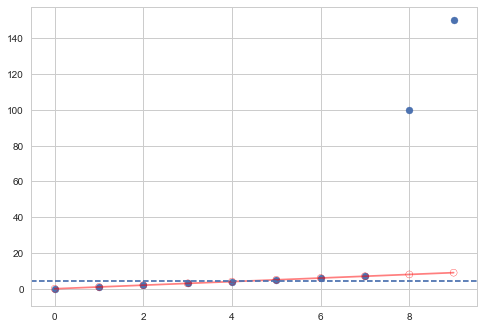

In [83]:
r2(actual, predicted)

### Special cases

In [84]:
actual = [1] * 10

/Users/amir.ziai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


nan

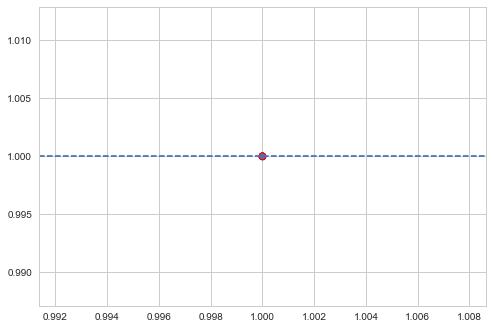

In [85]:
r2(actual, [1] * 10)

/Users/amir.ziai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in true_divide


-inf

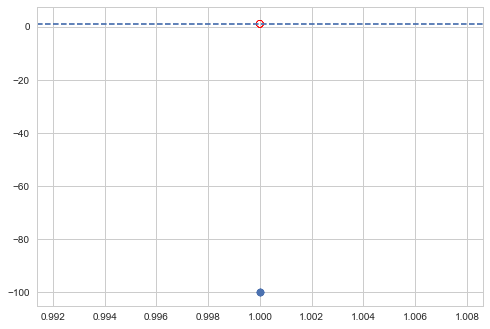

In [86]:
r2(actual, [-100] * 10)

In [87]:
actual = list(range(10))

-1.4848484848484849

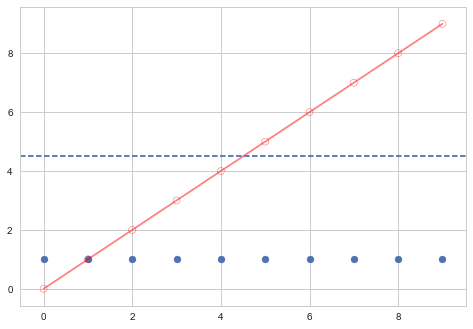

In [88]:
r2(actual, [1] * 10)

Predicting exactly the same as mean everytime gives us an `R2=0`

0.0

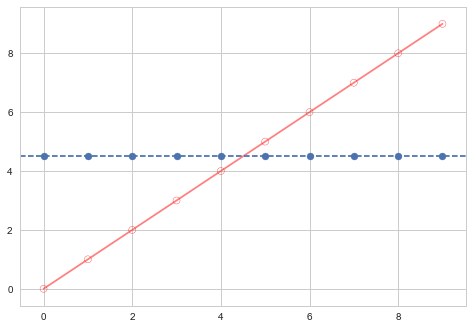

In [89]:
r2(actual, [4.5] * 10)